In [91]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
current_dir = os.getcwd()
os.chdir('../')

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [4]:
df = pd.read_csv(r'Data/bank-additional-full.csv')

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.shape

(41188, 21)

## Insights
    1. the datatypes are correctly identified.
    2. we have 5 float column, 5 int column, and 11 object columns.
    3. There is no missing values present in the dataset.
    4. dataset shape is 41188 rows and 21 columns

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### Age column

In [10]:
plt.figure(figsize = (100, 20))

<Figure size 10000x2000 with 0 Axes>

<Figure size 10000x2000 with 0 Axes>

In [11]:
age_count = df.age.value_counts()

In [12]:
age_df = age_count.reset_index()

In [13]:
age_df[age_df['count'] > 1000]

,age,count
0,31,1947
1,32,1846
2,33,1833
3,36,1780
4,35,1759
5,34,1745
6,30,1714
7,37,1475
8,29,1453
9,39,1432


<BarContainer object of 78 artists>

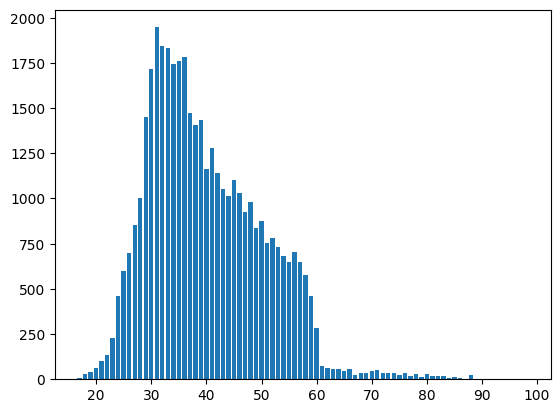

In [14]:
plt.bar(age_df['age'], age_df['count'])

# insights 
    1. age 30 to 40 have the high counts from the dataset

# categorical columns

In [15]:
numerical_columns = df.select_dtypes(include=['number'])

In [16]:
categorical_columns = df.drop(columns= numerical_columns)

In [17]:
print('numerical columns are:\n\n ', numerical_columns.columns, "\n\n the categorical columns are:\n\n", categorical_columns.columns)

numerical columns are:

  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object') 

 the categorical columns are:

 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [18]:
cat_dct = {}
for col in categorical_columns.columns:
    cat_dct.update({col : categorical_columns[col].value_counts().reset_index()})

In [19]:
cat_dct['job']

,job,count
0,admin.,10422
1,blue-collar,9254
2,technician,6743
3,services,3969
4,management,2924
5,retired,1720
6,entrepreneur,1456
7,self-employed,1421
8,housemaid,1060
9,unemployed,1014


In [20]:
cat_dct['marital']

,marital,count
0,married,24928
1,single,11568
2,divorced,4612
3,unknown,80


In [21]:
cat_dct['education']

,education,count
0,university.degree,12168
1,high.school,9515
2,basic.9y,6045
3,professional.course,5243
4,basic.4y,4176
5,basic.6y,2292
6,unknown,1731
7,illiterate,18


In [22]:
cat_dct['default']

,default,count
0,no,32588
1,unknown,8597
2,yes,3


In [23]:
cat_dct['housing']

,housing,count
0,yes,21576
1,no,18622
2,unknown,990


In [24]:
cat_dct['loan']

,loan,count
0,no,33950
1,yes,6248
2,unknown,990


In [26]:
cat_dct['contact']

,contact,count
0,cellular,26144
1,telephone,15044


In [27]:
cat_dct['month']

,month,count
0,may,13769
1,jul,7174
2,aug,6178
3,jun,5318
4,nov,4101
5,apr,2632
6,oct,718
7,sep,570
8,mar,546
9,dec,182


In [28]:
cat_dct['day_of_week']

,day_of_week,count
0,thu,8623
1,mon,8514
2,wed,8134
3,tue,8090
4,fri,7827


In [29]:
cat_dct['poutcome']

,poutcome,count
0,nonexistent,35563
1,failure,4252
2,success,1373


In [30]:
cat_dct['y']

,y,count
0,no,36548
1,yes,4640


# data cleaning
    1. change admin. to admin
    2. university.degree to university_degree
    3. high.school	to high_school
    4. basic.9y to basic_9y
    5. professional.course to professional_course
    6. basic.4y to basic_4y
    7. basic.6y to basic_6y

In [33]:
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# data cleaning
    emp.var.rate -->> emp_var_rate,
    cons.price.idx -->> cons_price_idx,
    cons.conf.idx -->> cons_conf_idx,
    nr.employed -->> nr_employed

In [41]:
numerical_columns.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


# Data Transformation

In [42]:
def rename_columns(df, dct:dict):
    return df.rename(columns = dct)

def repalce_values_column(df, column_name, old_value, new_value):
    df[column_name] = df[column_name].replace(old_value, new_value)
    return df

In [47]:
col = {'emp.var.rate' : 'emp_var_rate',
        'cons.price.idx' : 'cons_price_idx',
        'cons.conf.idx': 'cons_conf_idx',
        'nr.employed' :'nr_employed'}

df = rename_columns(df, dct = col)
df = repalce_values_column(df, 'education', "university.degree" , "university_degree")
df = repalce_values_column(df, 'education', "high.school", "high_school")
df = repalce_values_column(df, 'education', "basic.9y", "basic_9y")
df = repalce_values_column(df, 'education', "professional.course", "professional_course")
df = repalce_values_column(df, 'education', "basic.4y" , "basic_4y")
df = repalce_values_column(df, 'education', "basic.6y", "basic_6y")

In [48]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic_4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high_school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high_school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic_6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high_school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional_course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional_course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university_degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional_course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [70]:
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder

def convert_categorical_to_numerical(df, target_column, output_file='category_mappings.json'):
    # Separate features and target
    # X = df.drop(columns=[target_column])
    # y = df[target_column]

    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Initialize dictionary to store mappings
    category_mappings = {}

    # Convert categorical columns to numerical
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        # Convert numpy int32 to Python int
        category_mappings[col] = {str(k): int(v) for k, v in zip(le.classes_, le.transform(le.classes_))}

    # Create a new DataFrame with numerical columns
    # new_df = pd.concat([X, y], axis=1)

    # Save mappings to a JSON file
    with open(output_file, 'w') as file:
        json.dump(category_mappings, file, indent=4)

    return df, category_mappings

# # Example usage
# if _name_ == "_main_":
#     # Load your dataset
#     df = pd.read_csv('your_data.csv')

#     # Specify the target column
#     target_column = 'target'

#     # Convert categorical columns to numerical and get new DataFrame
#     new_df, mappings = convert_categorical_to_numerical(df, target_column)

#     # Display the new DataFrame and mappings
#     print(new_df.head())
#     print(mappings)

In [71]:
new_df, mappings = convert_categorical_to_numerical(df, 'y')

In [72]:
new_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [73]:
mappings

{'job': {'admin.': 0,
  'blue-collar': 1,
  'entrepreneur': 2,
  'housemaid': 3,
  'management': 4,
  'retired': 5,
  'self-employed': 6,
  'services': 7,
  'student': 8,
  'technician': 9,
  'unemployed': 10,
  'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3},
 'education': {'basic_4y': 0,
  'basic_6y': 1,
  'basic_9y': 2,
  'high_school': 3,
  'illiterate': 4,
  'professional_course': 5,
  'university_degree': 6,
  'unknown': 7},
 'default': {'no': 0, 'unknown': 1, 'yes': 2},
 'housing': {'no': 0, 'unknown': 1, 'yes': 2},
 'loan': {'no': 0, 'unknown': 1, 'yes': 2},
 'contact': {'cellular': 0, 'telephone': 1},
 'month': {'apr': 0,
  'aug': 1,
  'dec': 2,
  'jul': 3,
  'jun': 4,
  'mar': 5,
  'may': 6,
  'nov': 7,
  'oct': 8,
  'sep': 9},
 'day_of_week': {'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4},
 'poutcome': {'failure': 0, 'nonexistent': 1, 'success': 2},
 'y': {'no': 0, 'yes': 1}}

# Correlation analysis 

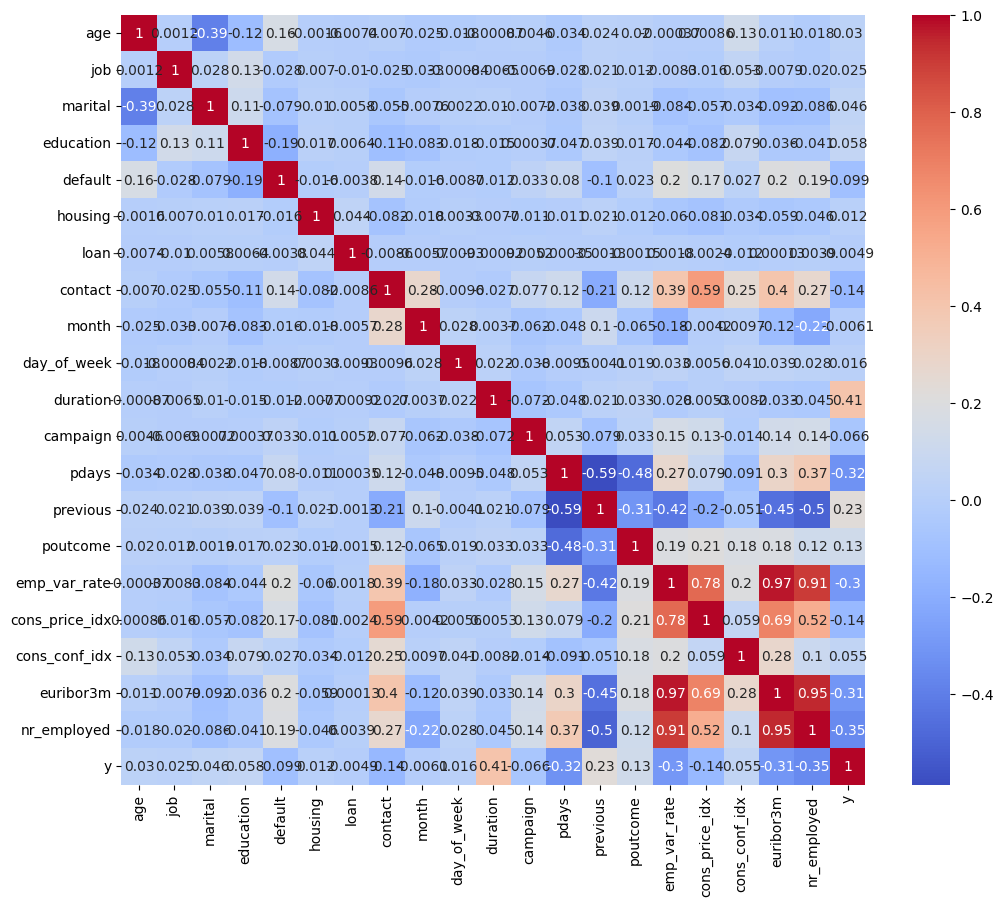

In [74]:
# Calculate correlation matrix
corr_matrix = new_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Univriate selection

In [80]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Assume target variable is 'target'
X = new_df.drop(columns=['y'])
y = new_df['y']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=chi2, k=15)
fit = best_features.fit(X_scaled, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

# Print 10 best features
print(featureScores.nlargest(15, 'Score'))

             Specs       Score
18       euribor3m  890.685536
7          contact  547.958309
15    emp_var_rate  541.304067
19     nr_employed  502.655177
13        previous  441.453204
10        duration  358.018123
4          default  160.961452
12           pdays  157.983753
16  cons_price_idx   72.585470
14        poutcome   49.115587
3        education   23.943898
11        campaign   16.140129
17   cons_conf_idx   10.795785
2          marital    9.265199
1              job    8.197776


In [82]:
featureScores.nlargest(20, 'Score')

,Specs,Score
18,euribor3m,890.685536
7,contact,547.958309
15,emp_var_rate,541.304067
19,nr_employed,502.655177
13,previous,441.453204
10,duration,358.018123
4,default,160.961452
12,pdays,157.983753
16,cons_price_idx,72.585470
14,poutcome,49.115587


# Recursive Fearture Elimination 

In [83]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Feature extraction
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get selected features
selected_features = X.columns[fit.support_]
print(selected_features)

Num Features: 10
Selected Features: [ True  True False  True False False False False False  True  True  True
  True False False False False  True  True  True]
Feature Ranking: [ 1  1  4  1 11  5  8 10  7  1  1  1  1  9  2  6  3  1  1  1]
Index(['age', 'job', 'education', 'day_of_week', 'duration', 'campaign',
       'pdays', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')


In [84]:
selected_features

Index(['age', 'job', 'education', 'day_of_week', 'duration', 'campaign',
       'pdays', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

In [120]:
# Feature extraction
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get selected features
selected_features = X.columns[fit.support_]
print(selected_features) 

Num Features: 10
Selected Features: [ True  True False  True False False False False False  True  True  True
 False False  True False False  True  True  True]
Feature Ranking: [ 1  1  4  1 11  5  7 10  6  1  1  1  2  9  1  8  3  1  1  1]
Index(['age', 'job', 'education', 'day_of_week', 'duration', 'campaign',
       'poutcome', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')


# Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. feature {X.columns[indices[i]]} ({importances[indices[i]]})")

# Select top 10 features
top_features = X.columns[indices[:10]]
print(top_features)

Feature ranking:
1. feature duration (0.32159150366153316)
2. feature euribor3m (0.10649538958534932)
3. feature age (0.0926460118614237)
4. feature nr_employed (0.06050088202937785)
5. feature job (0.04842595049804569)
6. feature education (0.04401113034992841)
7. feature campaign (0.043097039956877824)
8. feature day_of_week (0.03988818097622408)
9. feature poutcome (0.03060861070243115)
10. feature cons_conf_idx (0.029767724380258924)
11. feature pdays (0.02964050311484104)
12. feature emp_var_rate (0.023967637184229385)
13. feature marital (0.02396577348585132)
14. feature cons_price_idx (0.02085752325794344)
15. feature housing (0.019916572455181754)
16. feature month (0.016718033577738604)
17. feature loan (0.014669574575026097)
18. feature previous (0.014333146495705528)
19. feature contact (0.0099227694818998)
20. feature default (0.00897604237013301)
Index(['duration', 'euribor3m', 'age', 'nr_employed', 'job', 'education',
       'campaign', 'day_of_week', 'poutcome', 'cons_co

# PCA

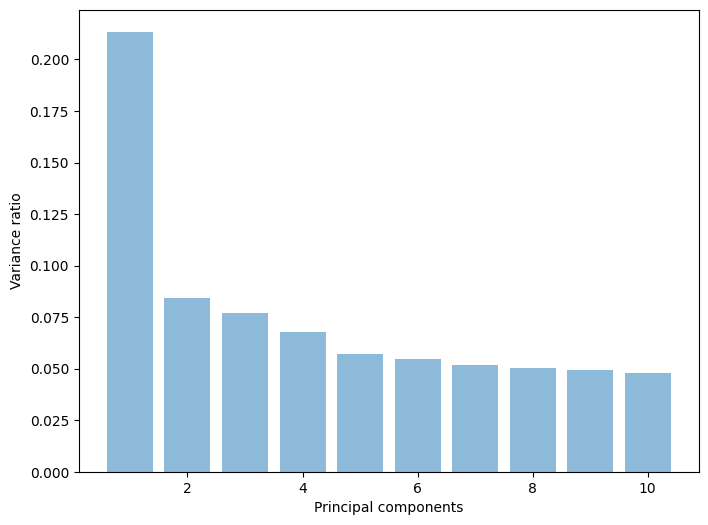

In [89]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

# VIF

In [117]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.9 MB 12.5 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/9.9 MB 18.0 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/9.9 MB 17.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/9.9 MB 17.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/9.9 MB 17.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/9.9 MB 17.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/9.9 MB 17.6 MB/s eta 0:00:01
   ------- -------------------------------- 1.9/9.9 MB 6.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.9 MB 7.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.6/9.9 MB 9.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.9 MB 9.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.9 MB 9.1 MB/s eta 0:00:01
   ---------

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           Feature           VIF
0              age     19.743263
1              job      2.120103
2          marital      5.654637
3        education      4.463138
4          default      1.404255
5          housing      2.205619
6             loan      1.207795
7          contact      2.842877
8            month      6.776792
9      day_of_week      3.085540
10        duration      2.016372
11        campaign      1.930171
12           pdays    165.538995
13        previous      5.964609
14        poutcome     34.133022
15    emp_var_rate     40.276599
16  cons_price_idx  37657.578639
17   cons_conf_idx    131.632938
18       euribor3m    331.165760
19     nr_employed  43072.145889


# Insights 
    1. There are mulitcolinearity present in the some of the columns 
    2. i am considering the Recursive Fearture Elimination for feature selection here


# model building

In [122]:
X.shape, y.shape

((41188, 20), (41188,))

In [130]:
# add the target column
data = pd.concat([new_df[selected_features], new_df['y']], axis =1)

In [131]:
data.head()

,age,job,education,day_of_week,duration,campaign,poutcome,cons_conf_idx,euribor3m,nr_employed,y
0,56,3,0,1,261,1,1,-36.4,4.857,5191.0,0
1,57,7,3,1,149,1,1,-36.4,4.857,5191.0,0
2,37,7,3,1,226,1,1,-36.4,4.857,5191.0,0
3,40,0,1,1,151,1,1,-36.4,4.857,5191.0,0
4,56,7,3,1,307,1,1,-36.4,4.857,5191.0,0


In [132]:
data.shape

(41188, 11)

In [135]:
data.columns

Index(['age', 'job', 'education', 'day_of_week', 'duration', 'campaign',
       'poutcome', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

# Split the feature 

In [136]:
X = data.drop(['y'], axis = 1)
y = data.y

In [139]:
X.head()

,age,job,education,day_of_week,duration,campaign,poutcome,cons_conf_idx,euribor3m,nr_employed
0,56,3,0,1,261,1,1,-36.4,4.857,5191.0
1,57,7,3,1,149,1,1,-36.4,4.857,5191.0
2,37,7,3,1,226,1,1,-36.4,4.857,5191.0
3,40,0,1,1,151,1,1,-36.4,4.857,5191.0
4,56,7,3,1,307,1,1,-36.4,4.857,5191.0


In [140]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

# Model Train

In [141]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1092837465)

In [143]:
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

params = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

In [144]:
best_models = {}
best_scores = {}

for model_name in models:
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")

Tuning hyperparameters for RandomForest...
Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 200}
Best cross-validation score for RandomForest: 0.9155690440060699
Tuning hyperparameters for SVM...
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score for SVM: 0.9021244309559939
Tuning hyperparameters for LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
Best cross-validation score for LogisticRegression: 0.9009711684370257
Tuning hyperparameters for KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score for KNN: 0.9035811836115325


In [145]:
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

print(f"Best model: {best_model_name} with cross-validation score: {best_scores[best_model_name]}")

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(f"Test accuracy for {best_model_name}: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best model: RandomForest with cross-validation score: 0.9155690440060699
Test accuracy for RandomForest: 0.9151493080844866
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7320
           1       0.65      0.52      0.58       918

    accuracy                           0.92      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.92      0.91      8238



In [146]:
dump(best_model, f'best_model_{best_model_name}.joblib')
print(f"Best model saved as best_model_{best_model_name}.joblib")

Best model saved as best_model_RandomForest.joblib


In [ ]:
models:
  RandomForest:
    class: "RandomForestClassifier"
  SVM:
    class: "SVC"
  LogisticRegression:
    class: "LogisticRegression"
  KNN:
    class: "KNeighborsClassifier"

params:
  RandomForest:
    n_estimators: [100, 200]
    max_depth: [None, 10, 20]
  SVM:
    C: [0.1, 1, 10]
    kernel: ['linear', 'rbf']
  LogisticRegression:
    C: [0.1, 1, 10]
    penalty: ['l2']
  KNN:
    n_neighbors: [3, 5, 7]
    weights: ['uniform', 'distance']

In [ ]:
import yaml
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

# Read the YAML configuration file
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Create models dictionary from config
models = {name: eval(config['models'][name]['class'])() for name in config['models']}

# Extract parameters from config
params = config['params']

best_models = {}
best_scores = {}

# Assuming X_train, y_train, X_test, and y_test are predefined
for model_name in models:
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")

best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

print(f"Best model: {best_model_name} with cross-validation score: {best_scores[best_model_name]}")

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(f"Test accuracy for {best_model_name}: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

dump(best_model, f'best_model_{best_model_name}.joblib')
print(f"Best model saved as best_model_{best_model_name}.joblib")